В цьому домашньому завданні відпрацюємо з вами знання, отримані в модулі зі статистики.

**Завдання 1.** Ми обговорили з Вами на лекції, що велика літера Сігма грецького алфавіту позначає в математиці суму. Знайдіть з використанням Python $\Sigma x$, $\Sigma x^2$, та $\Sigma (x-1)^2$ для наступного набору даних:
`1 3 4`
Виведіть результат кожного обчислення на екран.

In [3]:
import numpy as np

In [4]:
X = np.array([1,3,4])
X

array([1, 3, 4])

In [15]:
float(np.sum(X)), float(np.sum(X**2)), float(np.sum((X-1)**2))

(8.0, 26.0, 13.0)

**Завдання 2.** Ми зібрали дані про суму покупок в гривнях 20ма випадково обраними клієнтами в нашому магазині (всього клієнтів у нас більше) за минулий місяць. Вони представлені в змінній `sum_purchases`. Знайдіть **вибіркове середнє** для цих даних кожним з зазначених методів:   

  2.1. без використання жодних бібліотек, користуючись тільки Python.  
  2.2. використовуючи відповідний метод бібліотеки `numpy`.

  Виведіть результат обчислень в кожному з випадків на екран та порівняйте результати. Вони співпадають?

In [16]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [17]:
sum_purchases_mean = sum(sum_purchases) / len(sum_purchases)
sum_purchases_mean

667.95

In [19]:
float(np.mean(sum_purchases))

667.95

**Завдання 3.** Для того ж набору даних в змінній `sum_purchases` обчисліть **медіану** кожним з зазначених методів:  

  3.1. без використання жодних бібліотек, користуючись тільки Python.  
  3.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран. Порівняйте результати зі значенням вибіркового середнього. Напишіть коментар, для яких задач ви б використовували вибіркове середнє, а для яких - медіану?

In [20]:
(sorted(sum_purchases)[len(sum_purchases)//2 - 1] + sorted(sum_purchases)[len(sum_purchases)//2]) / 2

319.0

In [23]:
float(np.median(sum_purchases))

319.0

**Завдання 4**. Обчислість стандартне відхилення наведеної вибірки в змінній `sum_purchases` кожним з зазначених методів:  

  4.1. без використання жодних бібліотек, користуючись тільки Python.  
  4.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран.

In [24]:
float(np.sqrt(sum([(x - sum_purchases_mean) ** 2 for x in sum_purchases]) / ( len(sum_purchases))))

1096.0692713054227

In [25]:
float(np.std(sum_purchases))

1096.0692713054227

**Завдання 5**. Ми провели дослідження віку студентів-першокурсників. Виявилось, що
- 10 студентів мають вік 16 років
- 25 студентів - 17 років
- 20 студентів - 18 років
- 2 студенти - 20 років

Обчислість середнє значення для цієї вибірки будь-яким способом - на чистому Python або з numpy - та виведіть результат на екран.

In [29]:
bukvaryky =  [16] * 10 + [17] * 25 + [18] * 20 + [20] * 2
float(np.mean(bukvaryky))

17.280701754385966

**Завдання 6**. Крім даних про суму покупок, ми зібрали ще дані про кількість відвідувань кожного з кожного покупця, які знаходяться в змінній `visits`. Обчисліть коефіцієнт кореляції Пірсона для суми покупок і кількості відвідувань кожним з зазначених методів:  

  6.1. без використання жодних бібліотек, користуючись тільки Python.  
  6.2. використовуючи відповідний метод бібліотеки numpy.  
  
Виведіть результат на екран. Проаналізуйте результат.

Виведіть додатково графік розсіювання викликавши код нижче і зробіть заключення, чи варто щось змінити при підрахунку кореляції, аби коефіцієнт Пірсона показував коректну оцінку лінійної залежності?

In [30]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [43]:
mean_sum_purchases = sum(sum_purchases) / len(sum_purchases)
mean_visits = sum(visits) / len(visits)
nominator = sum((sum_purchases[i] - mean_sum_purchases) * (visits[i] - mean_visits) for i in range(len(sum_purchases)))
denominator_A = sum((sum_purchases[i] - mean_sum_purchases) ** 2 for i in range(len(sum_purchases)))
denominator_B = sum((visits[i] - mean_visits) ** 2 for i in range(len(visits)))
pirs_sum_purchases_visits = nominator / (denominator_A * denominator_B) ** 0.5 # Тут ми скоротили чисельник та знаменник на len(sum_purchases) - 1 (= len(visits) - 1)!
pirs_sum_purchases_visits

-0.3026584468766646

In [46]:
correlation_matrix = np.corrcoef(sum_purchases, visits)
pearson_correlation = float(correlation_matrix[0, 1])
pearson_correlation

-0.3026584468766646

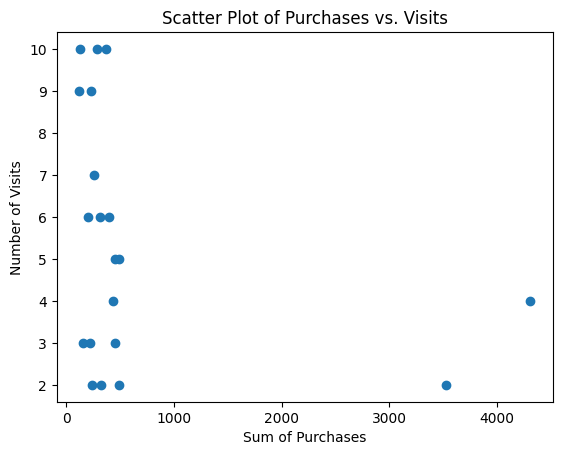

In [47]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

**Завдання 7**. В попередньому завданні ми помітили, що викиди нам заважають отримати "правдиве" значення кореляції. Давайте вилучимо записи, які відповідають значенням з викидами в сумі покупок і обчисліть коеф. кореляції. Для цього поставте `threshold`, який дорінює середньому значенню + 2 стандартних вдіхилля суми покупок і всі значення, які більше за нього, будемо вважати викидами (є і інші правила для визначення викидів - з ним и познайомимось пізніше).

Вилучіть значення з обох масивів і обчисліть коеф. кореляції Пірсона з допомогою `numpy` для кількості візитів і суми покупок без записів-викидів. Виведіть результат на екран, побудуйте діаграму розсіювання і проаналізуйте результат: що можемо сказати про залежність в даних?

Коефіцієнт кореляції Пірсона без викидів: -0.3685212078127798


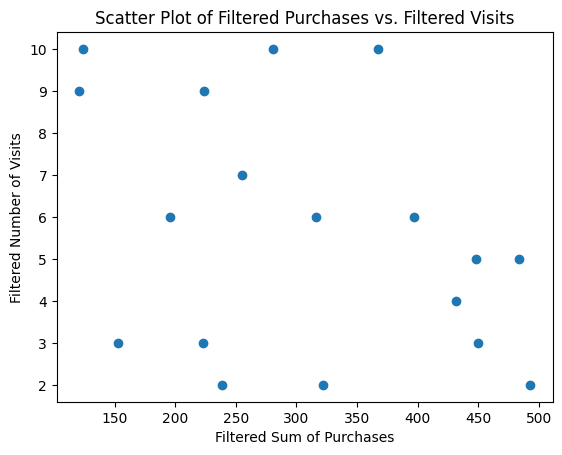

In [52]:
np_sum_purchases = np.array(sum_purchases)
np_visits = np.array(visits)

std_sum_purchases = np.std(sum_purchases)
threshold = mean_sum_purchases + 2 * std_sum_purchases

mask = sum_purchases <= threshold

filtered_sum_purchases = np_sum_purchases[mask]
filtered_visits = np_visits[mask]

correlation_matrix = np.corrcoef(filtered_sum_purchases, filtered_visits)
pearson_correlation = float(correlation_matrix[0, 1])

print("Коефіцієнт кореляції Пірсона без викидів:", pearson_correlation)

plt.scatter(filtered_sum_purchases, filtered_visits)
plt.title('Scatter Plot of Filtered Purchases vs. Filtered Visits')
plt.xlabel('Filtered Sum of Purchases')
plt.ylabel('Filtered Number of Visits');


**Висновок:** оскільки коефіцієнт кореляції Пірсона ``без викидів'' $ \approx - 0.37,$ то між сумою покупок та кількістю відвідувань спостерігається слабка негативна лінійна залежність. Це означає, що зі збільшенням кількості візитів покупці дещо зменшують суму покупок або навпаки $-$ ті, хто витрачає більше, відвідують рідше. Однак цей зв’язок є незначним, тож робити остаточні висновки щодо причинно-наслідкової залежності наразі передчасно.